In [63]:
import pandas as pd
#1. 데이터 불러오기 및 전처리
#파일 넣기기
input_file = "서울대기오염_2019.xlsx"

#1. 파일 확인: 
df = pd.read_excel(input_file)

print(df.info())
print(df.isnull().sum())

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9491 entries, 0 to 9490
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               9491 non-null   object 
 1   측정소명             9491 non-null   object 
 2   미세먼지             9278 non-null   float64
 3   초미세먼지            9288 non-null   float64
 4   오존               9294 non-null   float64
 5   이산화질소
NO2 (ppm)  9285 non-null   float64
 6   일산화탄소
CO (ppm)   9234 non-null   float64
 7   아황산가스
SO2(ppm)   9298 non-null   float64
dtypes: float64(6), object(2)
memory usage: 593.3+ KB
None
날짜                    0
측정소명                  0
미세먼지                213
초미세먼지               203
오존                  197
이산화질소\nNO2 (ppm)    206
일산화탄소\nCO (ppm)     257
아황산가스\nSO2(ppm)     193
dtype: int64


,날짜,측정소명,미세먼지,초미세먼지,오존,이산화질소\nNO2 (ppm),일산화탄소\nCO (ppm),아황산가스\nSO2(ppm)
0,전체,평균,42.0,25.0,0.025,0.028,0.5,0.004
1,2019-12-31,평균,26.0,15.0,0.022,0.016,0.4,0.003
2,2019-12-31,강남구,22.0,14.0,0.025,0.014,0.4,0.003
3,2019-12-31,강동구,27.0,19.0,0.019,0.020,0.4,0.003
4,2019-12-31,강북구,31.0,17.0,0.022,0.022,0.4,0.002
...,...,...,...,...,...,...,...,...
9486,2019-01-01,용산구,30.0,24.0,0.014,0.032,0.6,0.003
9487,2019-01-01,은평구,33.0,22.0,0.020,0.023,0.9,0.005
9488,2019-01-01,종로구,34.0,21.0,0.017,0.031,0.7,0.004
9489,2019-01-01,중구,36.0,25.0,0.020,0.030,0.6,0.003


In [65]:
# [1-1] 데이터프레임으로 불러오기
# [1-2] 분석변수만 추출 및 컬럼명 변경: date, district, pm10, pm25

# [1-2] 분석변수 추출 및 컬럼명 변경
df_filtered = df[['날짜', '측정소명', '미세먼지', '초미세먼지']].copy()
df_filtered.columns = ['date', 'district', 'pm10', 'pm25']

df_filtered.isnull().sum()



date          0
district      0
pm10        213
pm25        203
dtype: int64

In [66]:
# [1-3] 결측치 확인 및 제거 (df_filtered 기준)
# df_filtered는 ['date', 'district', 'pm10', 'pm25'] 컬럼만 존재함

# 결측치가 있는 열 목록만 추출 (pm10, pm25만 해당)
columns_with_na = df_filtered.columns[df_filtered.isnull().any()].tolist()

# 'district'별 평균값으로 결측치 채우기
for col in columns_with_na:
    df_filtered[col] = df_filtered.groupby('district')[col].transform(lambda x: x.fillna(x.mean()))

# 결측치 확인
print(df_filtered.isnull().sum())

# PM10 수치를 등급(good/normal/bad/worse)으로 분류하는 작업이므로
# 정규화를 적용하지 않음. 정규화를 하면 절대 기준값(예: 30, 80 등)이 왜곡되어
# 등급 분류 기준이 의미 없게 되기 때문임.
df_filtered




date        0
district    0
pm10        0
pm25        0
dtype: int64


,date,district,pm10,pm25
0,전체,평균,42.0,25.0
1,2019-12-31,평균,26.0,15.0
2,2019-12-31,강남구,22.0,14.0
3,2019-12-31,강동구,27.0,19.0
4,2019-12-31,강북구,31.0,17.0
...,...,...,...,...
9486,2019-01-01,용산구,30.0,24.0
9487,2019-01-01,은평구,33.0,22.0
9488,2019-01-01,종로구,34.0,21.0
9489,2019-01-01,중구,36.0,25.0


In [67]:
# [1-4] 자료형 변환

# 1. 'date' 컬럼을 datetime 형식으로 변환
df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')

# 2. pm10, pm25 컬럼을 실수형으로 변환 (혹시 모를 문자 포함 대비)
df_filtered['pm10'] = pd.to_numeric(df_filtered['pm10'], errors='coerce')
df_filtered['pm25'] = pd.to_numeric(df_filtered['pm25'], errors='coerce')


df_filtered


C:\Users\kimye\AppData\Local\Temp\ipykernel_10476\258107857.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')


,date,district,pm10,pm25
0,NaT,평균,42.0,25.0
1,2019-12-31,평균,26.0,15.0
2,2019-12-31,강남구,22.0,14.0
3,2019-12-31,강동구,27.0,19.0
4,2019-12-31,강북구,31.0,17.0
...,...,...,...,...
9486,2019-01-01,용산구,30.0,24.0
9487,2019-01-01,은평구,33.0,22.0
9488,2019-01-01,종로구,34.0,21.0
9489,2019-01-01,중구,36.0,25.0


In [68]:
#2. 파생변수수

# [2-1] month, day 파생변수 생성
df_filtered['month'] = df_filtered['date'].dt.month

# [2-1] 요일 (숫자형: 월=0, 일=6)
df_filtered['day'] = df_filtered['date'].dt.dayofweek


df_filtered

,date,district,pm10,pm25,month,day
0,NaT,평균,42.0,25.0,NaN,NaN
1,2019-12-31,평균,26.0,15.0,12.0,1.0
2,2019-12-31,강남구,22.0,14.0,12.0,1.0
3,2019-12-31,강동구,27.0,19.0,12.0,1.0
4,2019-12-31,강북구,31.0,17.0,12.0,1.0
...,...,...,...,...,...,...
9486,2019-01-01,용산구,30.0,24.0,1.0,1.0
9487,2019-01-01,은평구,33.0,22.0,1.0,1.0
9488,2019-01-01,종로구,34.0,21.0,1.0,1.0
9489,2019-01-01,중구,36.0,25.0,1.0,1.0


In [69]:
# [2-2] 계절(season) 변수 생성

# 월(month) 컬럼 생성
df_filtered['month'] = df_filtered['date'].dt.month

# 계절(season) 컬럼 생성
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'autumn'
    else:
        return 'winter'

df_filtered['season'] = df_filtered['month'].apply(get_season)

df_filtered


,date,district,pm10,pm25,month,day,season
0,NaT,평균,42.0,25.0,NaN,NaN,winter
1,2019-12-31,평균,26.0,15.0,12.0,1.0,winter
2,2019-12-31,강남구,22.0,14.0,12.0,1.0,winter
3,2019-12-31,강동구,27.0,19.0,12.0,1.0,winter
4,2019-12-31,강북구,31.0,17.0,12.0,1.0,winter
...,...,...,...,...,...,...,...
9486,2019-01-01,용산구,30.0,24.0,1.0,1.0,winter
9487,2019-01-01,은평구,33.0,22.0,1.0,1.0,winter
9488,2019-01-01,종로구,34.0,21.0,1.0,1.0,winter
9489,2019-01-01,중구,36.0,25.0,1.0,1.0,winter


In [70]:
#3. 전처리 완료 데이터 확인 및 저장

# [3-1] 최종 분석 대상 데이터 확인
df_filtered
# [3-2] 'card_output.csv'로 저장
df.to_csv('201906_output.csv.csv')


In [71]:
# 데이터 분석 단계 4. 연간 미세먼지 평균 구하기

# [4-1] 전체 데이터 기준 PM10 평균

pm10_mean = df_filtered['pm10'].mean()
# 분석결과 작성
print(f"PM10의 전체 평균값: {pm10_mean:.2f} ㎍/m³")


PM10의 전체 평균값: 41.78 ㎍/m³


In [72]:
#5. 미세먼지 최댓값 날짜 확인
# [5-1] PM10 최댓값이 발생한 날짜, 구 출력
maximum_pm10 = df_filtered.loc[df_filtered['pm10'].idxmax()]

# 출력
print(f"PM10 최댓값: {maximum_pm10['pm10']} ㎍/m³")
print(f"날짜: {maximum_pm10['date'].date()}")
print(f"측정소(구): {maximum_pm10['district']}")



PM10 최댓값: 228.0 ㎍/m³
날짜: 2019-03-05
측정소(구): 강북구


In [73]:
# [6-1] 각 구별 PM10 평균 계산
pm10_district = df_filtered.groupby('district')['pm10'].mean().reset_index()

# 컬럼명 변경
pm10_district.columns = ['district', 'mean_pm10']

# [6-2] 상위 5개 구 출력
top5= pm10_district.sort_values(by='mean_pm10', ascending=False).head(5)

print(top5)

   district  mean_pm10
4       관악구  48.974359
18      양천구  47.695055
12      마포구  47.086154
3       강서구  46.504132
2       강북구  44.950685


In [74]:
# [7-1] 계절별 평균 pm10, pm25 동시 계산
seasonal_mean = df_filtered.groupby('season')[['pm10', 'pm25']].mean().reset_index()

# 컬럼명 변경
seasonal_mean.columns = ['season', 'mean_pm10', 'mean_pm25']

# [7-2] PM10 평균값 기준 오름차순 정렬
seasonal_mean_sorted = seasonal_mean.sort_values(by='mean_pm10', ascending=True)

# 출력
print(seasonal_mean_sorted)
df_filtered


   season  mean_pm10  mean_pm25
2  summer  26.519951  18.189842
0  autumn  32.076626  16.505728
1  spring  54.088629  31.558110
3  winter  54.618362  33.620668


,date,district,pm10,pm25,month,day,season
0,NaT,평균,42.0,25.0,NaN,NaN,winter
1,2019-12-31,평균,26.0,15.0,12.0,1.0,winter
2,2019-12-31,강남구,22.0,14.0,12.0,1.0,winter
3,2019-12-31,강동구,27.0,19.0,12.0,1.0,winter
4,2019-12-31,강북구,31.0,17.0,12.0,1.0,winter
...,...,...,...,...,...,...,...
9486,2019-01-01,용산구,30.0,24.0,1.0,1.0,winter
9487,2019-01-01,은평구,33.0,22.0,1.0,1.0,winter
9488,2019-01-01,종로구,34.0,21.0,1.0,1.0,winter
9489,2019-01-01,중구,36.0,25.0,1.0,1.0,winter


In [75]:
#8. PM10 등급(pm_grade) 분류 및 분포 확인

# [8-1] pm10 값을 기준으로 등급 분류 (good/normal/bad/worse)

# PM10 분류표 기반 분류
def grade_pm10(val):
    if val <= 30:
        return "good"
    elif val <= 80:
        return "normal"
    elif val <= 150:
        return "bad"
    else:
        return "worse"
    
# 등급(파생변수수) 컬럼 추가
df_filtered['pm_grade'] = df_filtered['pm10'].apply(grade_pm10)

# [8-2] 전체 데이터 기준 등급별 빈도, 비율 계산 (컬럼: pm_grade, n, pct)
grade_dist = df_filtered['pm_grade'].value_counts().reset_index()
grade_dist.columns = ['pm_grade', 'n']
grade_dist['pct'] = (grade_dist['n'] / grade_dist['n'].sum() * 100).round(2)

# 분석결과 작성
print(grade_dist)


  pm_grade     n    pct
0   normal  5227  55.07
1     good  3553  37.44
2      bad   627   6.61
3    worse    84   0.89


C:\Users\kimye\AppData\Local\Temp\ipykernel_10476\4030057799.py:16: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kimye\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


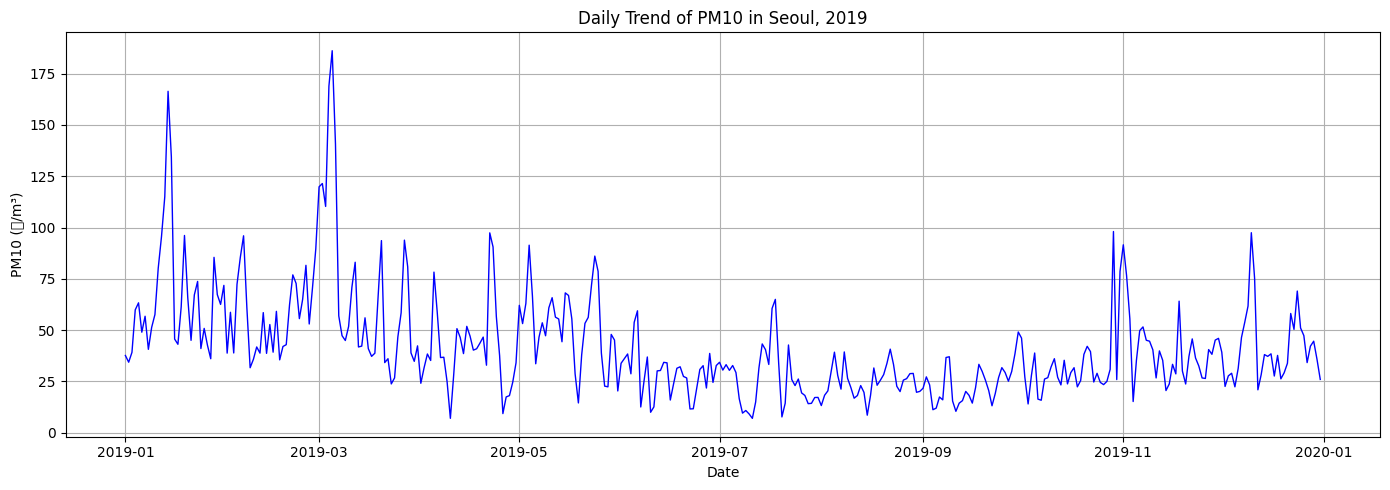

'\n2019년 서울시의 일별 PM10 추세를 살펴보면,\n1~3월에 거치면서 미세먼지 고농도로 피크를 찍는 것을 볼 수 있다. 특히, 3월 초에 약 180㎍/m³ 이상의 극심한 피크가 관측되었다.\n 이는 초봄 꽃가루, 대기 정체 등 계절 특성 및 시기적으로 활발하한 활동이 시작되는 시기이기 피크를 미세먼지 농도가 높은 것으로 보인다.\n\n반면, 6~8월 여름철에는 PM10 농도가 현저히 낮아지는 추세이다. 이는 장마철을 비롯한 강수량 증가 등이 관여한 것으로 보인다.\n\n11~12월 겨울 초입에는 다시 농도가 상승하며, 난방 및 대기 정체의 영향을 받는 것으로 추정된다.\n\n전체적으로 PM10 농도는 겨울에서 증가하여 봄에 고점을 찍고, 여름의 장마철 특성 등에 기반하여 낮은 계절적 패턴을 보여주었다. \n'

In [76]:
# 시각화 과제 10. 1년간 일별 미세먼지 추이 그래프

# [10-1] x축: date, y축: pm10 (선그래프)
import matplotlib.pyplot as plt
daily_pm10 = df_filtered.groupby('date')['pm10'].mean().reset_index()

# [10-2] 선그래프 그리기
plt.figure(figsize=(14, 5))
plt.plot(daily_pm10['date'], daily_pm10['pm10'], color='blue', linewidth=1)

# [10-2] 제목: 'Daily Trend of PM10 in Seoul, 2019'
plt.title('Daily Trend of PM10 in Seoul, 2019')
plt.xlabel('Date')
plt.ylabel('PM10 (㎍/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


# 분석결과 작성
'''
2019년 서울시의 일별 PM10 추세를 살펴보면,
1~3월에 거치면서 미세먼지 고농도로 피크를 찍는 것을 볼 수 있다. 특히, 3월 초에 약 180㎍/m³ 이상의 극심한 피크가 관측되었다.
 이는 초봄 꽃가루, 대기 정체 등 계절 특성 및 시기적으로 활발하한 활동이 시작되는 시기이기 피크를 미세먼지 농도가 높은 것으로 보인다.

반면, 6~8월 여름철에는 PM10 농도가 현저히 낮아지는 추세이다. 이는 장마철을 비롯한 강수량 증가 등이 관여한 것으로 보인다.

11~12월 겨울 초입에는 다시 농도가 상승하며, 난방 및 대기 정체의 영향을 받는 것으로 추정된다.

전체적으로 PM10 농도는 겨울에서 증가하여 봄에 고점을 찍고, 여름의 장마철 특성 등에 기반하여 낮은 계절적 패턴을 보여주었다. 
'''


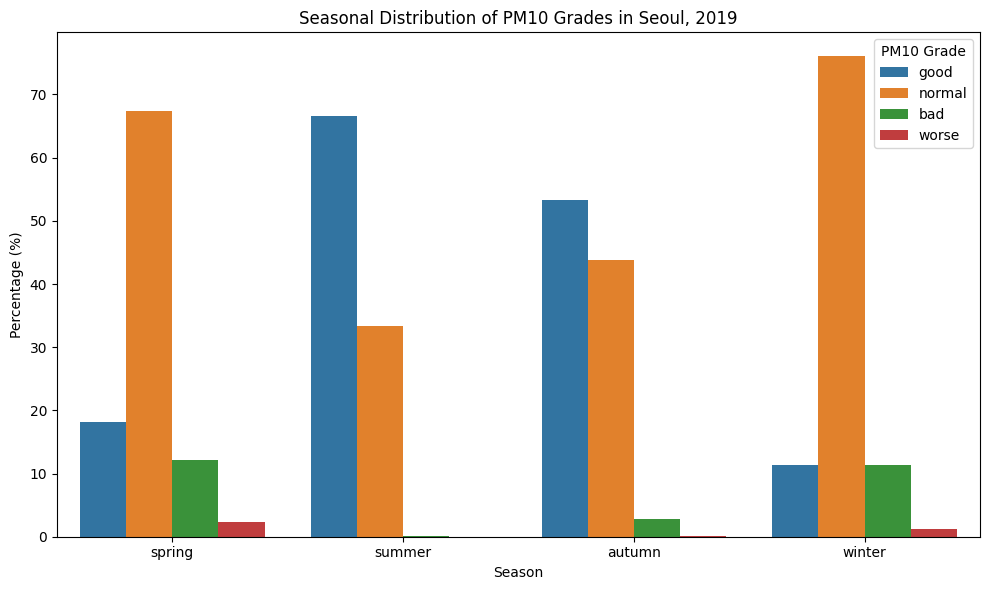

"\n2019년 서울의 PM10 등급을 계절별로 비교한 결과,\n여름은 전체의 약 67% 이상이 '좋음(good)' 등급으로 분포하며, 미세먼지 농도가 가장 양호하다.\n여름 특성상 강수량 증가, 공기 순환 활발 등의 기상 요인 관여하여 좋게 PM10 농도가 낮게 나왔음을 알 수 있다.\n\n겨울 및 봄은 각각 ‘normal’ 등급이 70% 이상으로 높게 나타났다.\n특히 봄철에는 ‘나쁨(bad)’과 ‘매우 나쁨(worse)’ 비율도 상대적으로 높은 것을 볼 수 있다.\n이는 겨울과 봄을 거치면서 봄철 꽃가루, 겨울철 난방 및 대기 정체가 관여한 것 같다.\n\n가을(autumn)은 '좋음'과 '보통' 등급이 비교적 균형을 이루며, 상대적으로 안정적인 양상을 띄고 있다.\n"

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# [11-1] 계절별 PM10 등급 비율 계산
season_grade_pct = (
    df_filtered.groupby(['season', 'pm_grade']).size()
    .reset_index(name='count')
)

# 전체 대비 비율 계산
total_by_season = df_filtered.groupby('season').size().reset_index(name='total')
season_grade_pct = season_grade_pct.merge(total_by_season, on='season')
season_grade_pct['pct'] = (season_grade_pct['count'] / season_grade_pct['total']) * 100

# [11-2, 11-3] 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(
    data=season_grade_pct,
    x='season', y='pct', hue='pm_grade',
    order=['spring', 'summer', 'autumn', 'winter'],
    hue_order=['good', 'normal', 'bad', 'worse']
)

plt.title('Seasonal Distribution of PM10 Grades in Seoul, 2019')
plt.xlabel('Season')
plt.ylabel('Percentage (%)')
plt.legend(title='PM10 Grade')
plt.tight_layout()
plt.show()

'''
2019년 서울의 PM10 등급을 계절별로 비교한 결과,
여름은 전체의 약 67% 이상이 '좋음(good)' 등급으로 분포하며, 미세먼지 농도가 가장 양호하다.
여름 특성상 강수량 증가, 공기 순환 활발 등의 기상 요인 관여하여 좋게 PM10 농도가 낮게 나왔음을 알 수 있다.

겨울 및 봄은 각각 ‘normal’ 등급이 70% 이상으로 높게 나타났다.
특히 봄철에는 ‘나쁨(bad)’과 ‘매우 나쁨(worse)’ 비율도 상대적으로 높은 것을 볼 수 있다.
이는 겨울과 봄을 거치면서 봄철 꽃가루, 겨울철 난방 및 대기 정체가 관여한 것 같다.

가을(autumn)은 '좋음'과 '보통' 등급이 비교적 균형을 이루며, 상대적으로 안정적인 양상을 띄고 있다.
'''



In [78]:
#최종 분석 데이터(전처리 파일)
df.to_csv('final_201906_output.csv.csv')